In [27]:
# load the dataset -> feature extraction -> data visualization -> data cleaning -> train test split
# -> model building -> model training -> model evaluation -> model saving -> streamlit application deploy

# disable warning
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

df = pd.read_csv('./twitter_sentiment.csv', header=None, index_col=[0])
df = df[[2,3]].reset_index(drop=True)
df.columns = ['sentiment', 'text']
df.head()

,sentiment,text
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


In [28]:
df.info()

df.isnull().sum()

df.dropna(inplace=True)

df = df[df['text'].apply(len)>1]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75682 entries, 0 to 75681
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  75682 non-null  object
 1   text       74996 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [29]:
df['sentiment'].value_counts()

sentiment
Negative      22530
Positive      20844
Neutral       18285
Irrelevant    12988
Name: count, dtype: int64

In [12]:

!pip install preprocess_kgptalkie
!pip install spacy
!pip install textblob
!pip install beautifulsoup4
!python -m spacy download en_core_web_sm
!pip install googletrans

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------- ------------------------------ 3.1/12.8 MB 18.5 MB/s eta 0:00:01
     -------------------- ------------------- 6.6/12.8 MB 16.1 MB/s eta 0:00:01
     ------------------------------- ------- 10.2/12.8 MB 16.8 MB/s eta 0:00:01
     --------------------------------------- 12.8/12.8 MB 16.4 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [32]:
df.columns

Index(['sentiment', 'text', 'char_counts', 'word_counts', 'avg_wordlength'], dtype='object')

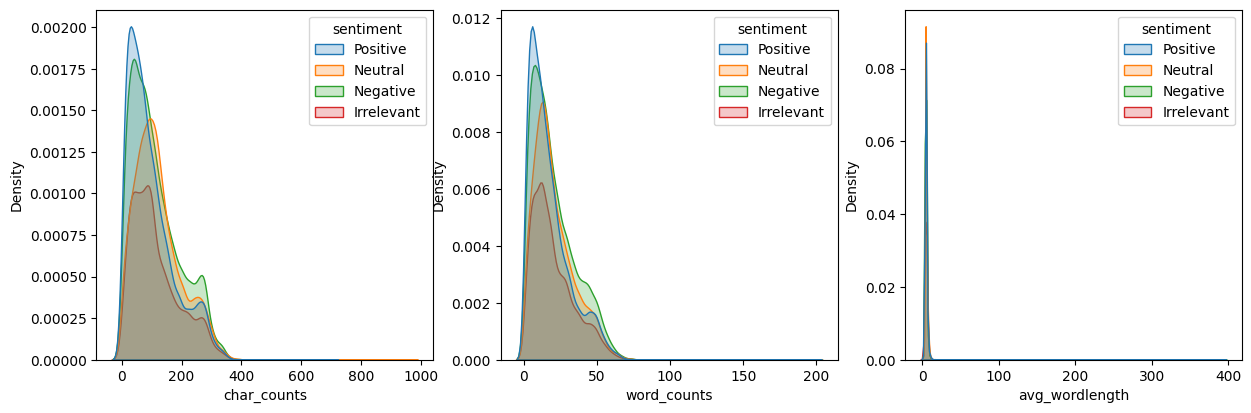

In [33]:
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# plot 2x4 grid histogram for each numerical feature
plt.figure(figsize=(20,10))

num_cols = df.select_dtypes(include='number').columns

for col in num_cols:
    plt.subplot(2,4, num_cols.get_loc(col)+1)

    # use sentiment as hue to see the distribution of each numerical feature
    # sns.distplot(df[col], label=col, color='red')
    # sns.histplot(x=col, hue='sentiment', data=df, color='green', bins=100, kde=True)
    sns.kdeplot(data=df, x=col, hue='sentiment', fill=True)

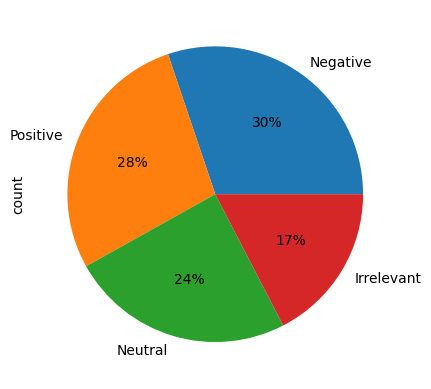

In [48]:
!pip install wordcloud
!pip install stopwords

df['sentiment'].value_counts().plot(kind='pie', autopct='%1.0f%%')

# word cloud
from wordcloud import WordCloud, STOPWORDS

stopwords = ["they've", 'at', "i'd", 'few', "they'd", 'from', 'i', "i'll", 'am', "can't", 'he', 'theirs', 'this', "when's", 'also', 'during', 'her', 'him', 'else', "how's", "wouldn't", 'those', 'whom', 'we', "weren't", 'there', 'they', 'in', 'against', "don't", 'should', "we'll", 'not', 'http', 'if', 'which', "who's", 'under', 'both', 'do', 'itself', 'can', 'only', 'is', 'doing', 'of', 'some', 'on', 'very', 'yours', 'such', "he's", 'k', "aren't", 'hence', 'my', 'myself', "there's", "you'll", "doesn't", 'here', 'ought', 'com', 'until', "mustn't", 'but', 'otherwise', "she'd", 'cannot', "let's", 'when', 'get', 'like', "why's", 'did', 'since', 'into', 'what', 'nor', 'because', 'who', 'was', 'and', 'between', 'how', 'up', 'you', "haven't", 'having', 'the', 'no', 'it', 'them', 'through', 'has', "i've", "hadn't", 'its', 'these', 'to', 'more', 'r', 'same', 'again', 'an', "where's", "wasn't", 'over', 'further', 'yourself', 'had', "she's", 'that', "we'd", "you'd", 'me', 'ours', "isn't", "shan't", 'with', 'any', 'once', 'our', "didn't", 'would', "she'll", 'most', "i'm", "what's", 'own', 'your', 'are', 'have', "here's", 'down', 'by', 'shall', "you're", "you've", "won't", 'than', 'themselves', 'yourselves', 'herself', 'his', 'about', 'ever', 'too', 'ourselves', 'or', "they're", 'so', "we're", 'being', "it's", 'does', 'just', "that's", 'therefore', "he'd", 'where', 'below', 'hers', 'a', 'as', "shouldn't", 'their', 'www', "hasn't", 'while', 'after', 'why', 'each', 'then', 'out', 'before', 'himself', 'for', 'other', 'she', 'however', 'could', 'be', 'were', 'off', "we've", 'all', 'been', "he'll", "couldn't", 'above', "they'll"]


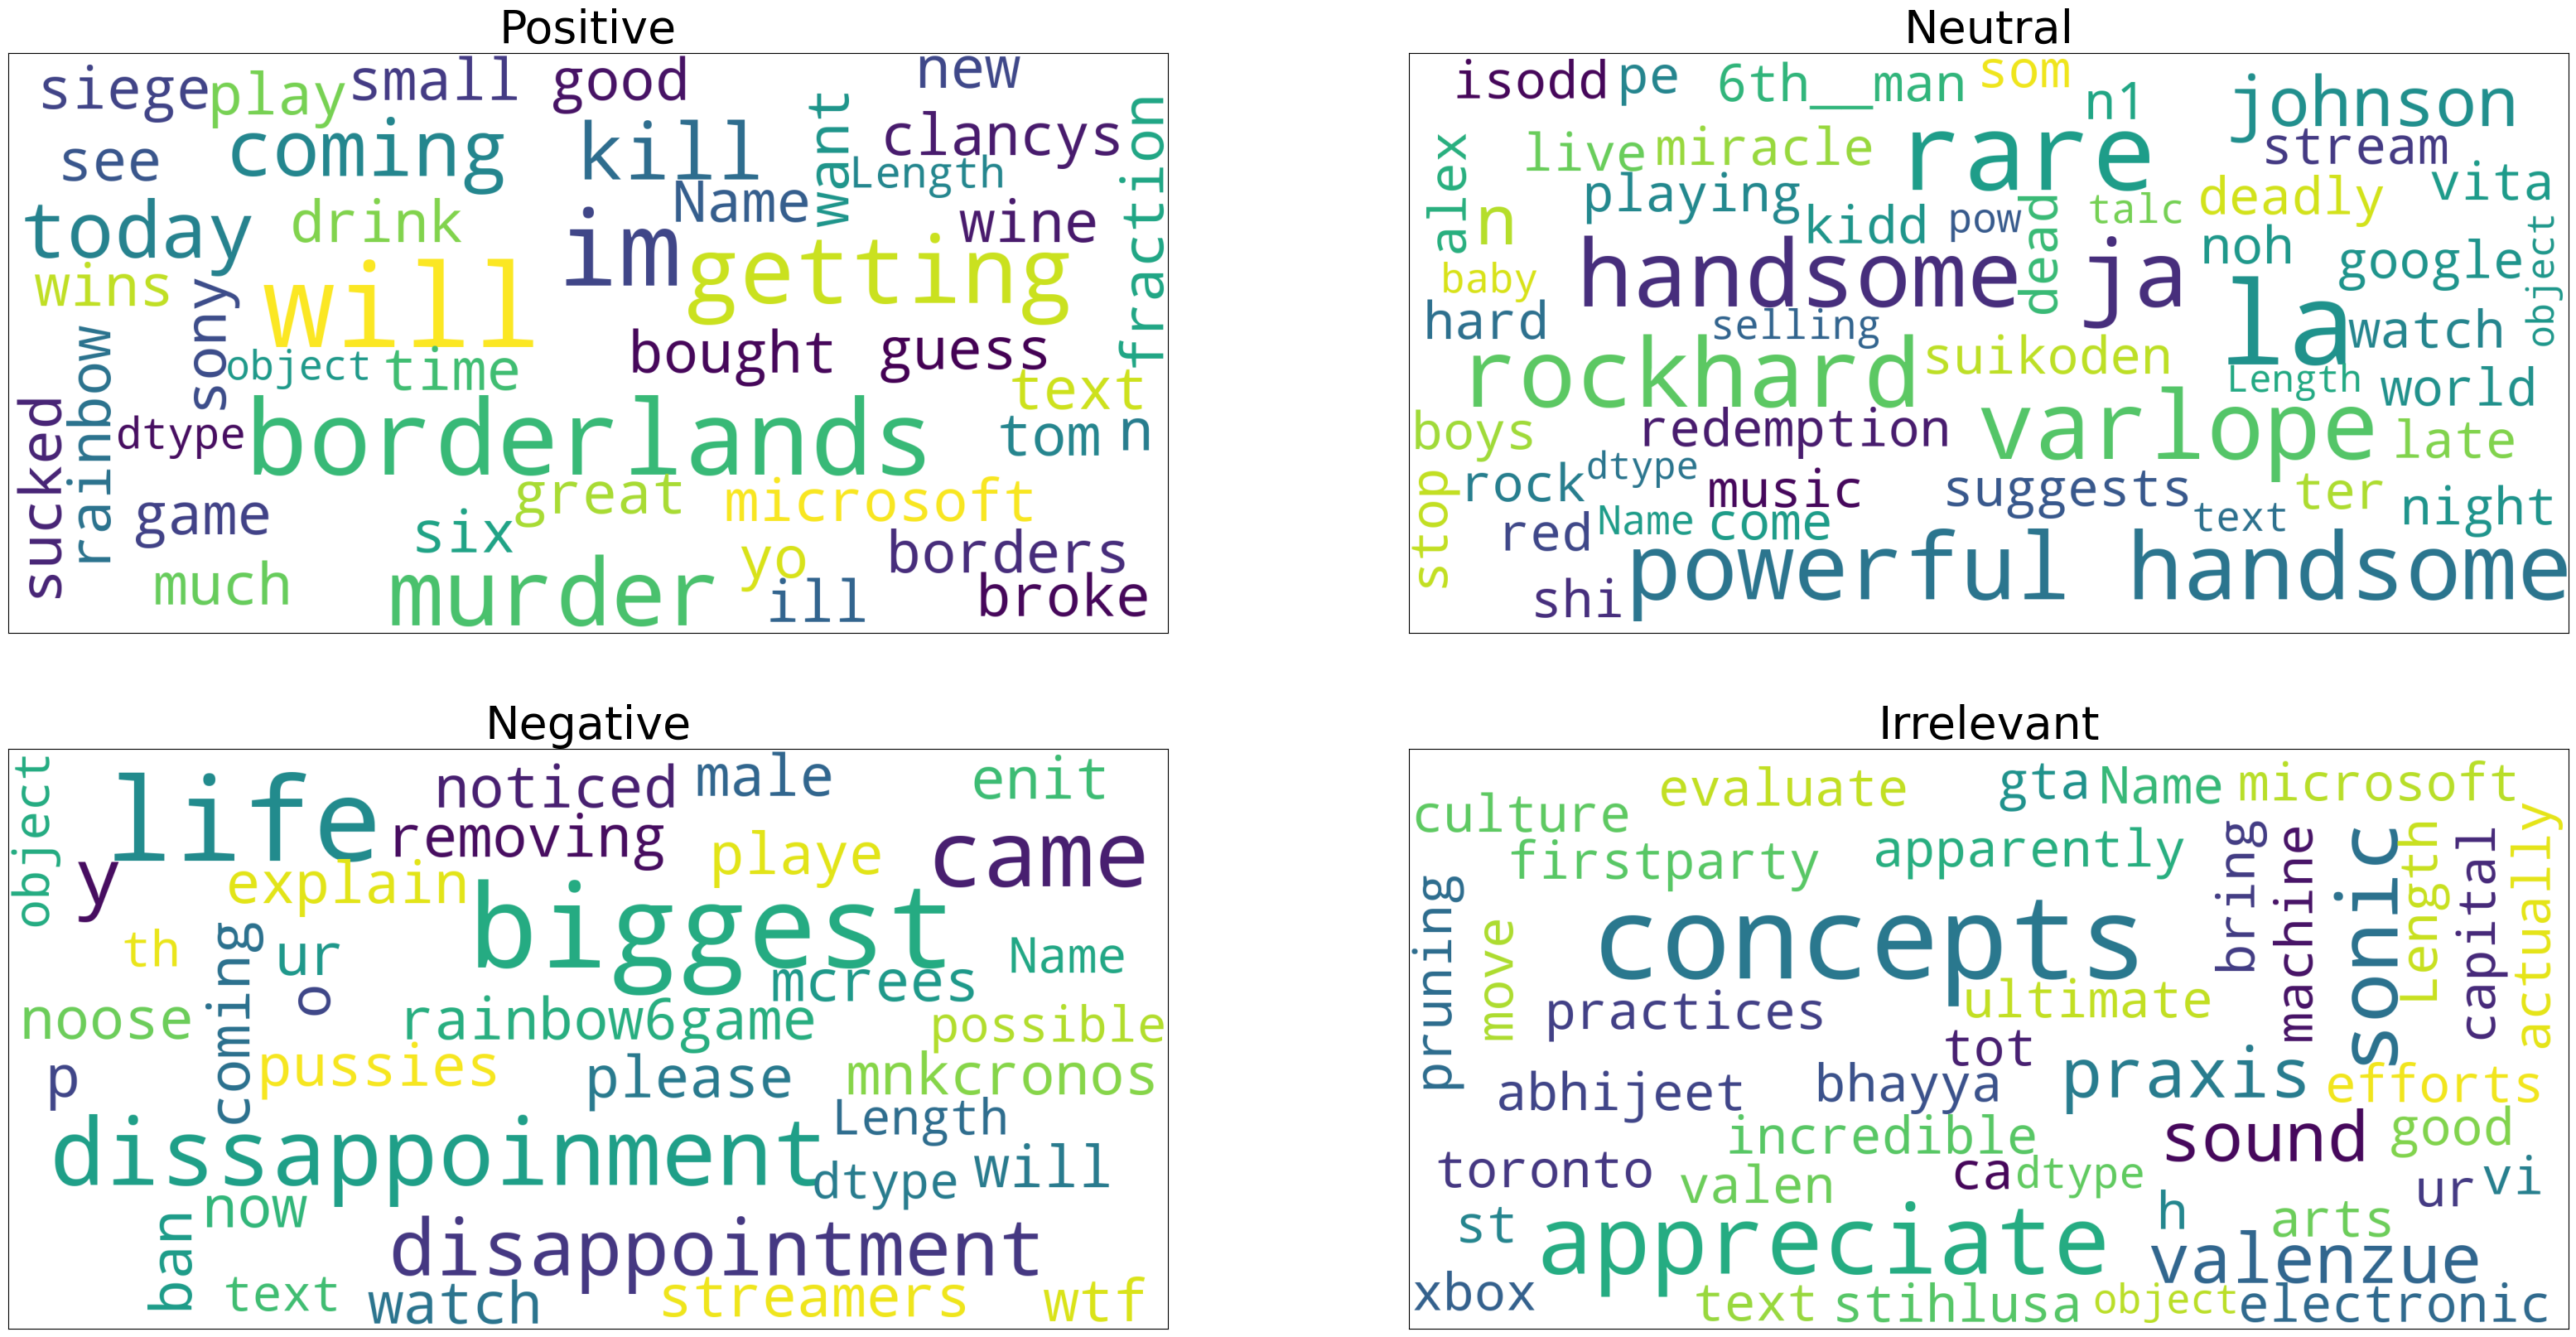

<Figure size 640x480 with 0 Axes>

In [49]:
# plot 2x2 grid word cloud for each sentiment
plt.figure(figsize=(40,20))

for index, col in enumerate(df['sentiment'].unique()):
    plt.subplot(2,2, index+1)
    # print(col)
    df1 = df[df['sentiment']==col]
    data = df1['text']
    wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=500, max_font_size=40, scale=5).generate(str(data))
    # fig = plt.figure(figsize=(15,15))
    # plt.axis('off')
    # disable ticks
    plt.xticks([])
    plt.yticks([])
    plt.imshow(wordcloud)
    plt.title(col, fontsize=40)
    
plt.show()
plt.tight_layout()

In [50]:
# Data Cleaning
# lowercase, remove url, html, punctuations, retweet

df['text'] = df['text'].apply(lambda x: x.lower())
df['text'] = df['text'].apply(lambda x: ps.remove_urls(x))
df['text'] = df['text'].apply(lambda x: ps.remove_html_tags(x))
df['text'] = df['text'].apply(lambda x: ps.remove_special_chars(x))
df['text'] = df['text'].apply(lambda x: ps.remove_rt(x))

In [51]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['text'], df['sentiment'], test_size=0.2, random_state=42)

In [52]:
X_train.shape, X_test.shape

((59717,), (14930,))

In [53]:
# model building
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

clf = Pipeline([('tfidf', TfidfVectorizer(stop_words=stopwords)), ('clf', RandomForestClassifier(n_estimators=100, n_jobs=-1))])
clf.fit(X_train, y_train)

# evaluation
from sklearn.metrics import accuracy_score

predictions = clf.predict(X_test)
print(accuracy_score(y_test, predictions))

0.9170797052913596


In [54]:
# save model
import pickle

pickle.dump(clf, open('twitter_sentiment.pkl', 'wb'))

In [58]:
clf.predict(['i am really glad to see you'])

array(['Positive'], dtype=object)

In [59]:
clf.predict(['i am upset'])

array(['Negative'], dtype=object)

In [62]:
clf.predict(['how the hell are we in halloween already'])

array(['Irrelevant'], dtype=object)

In [55]:
X_test.tolist()[:20]

['add 4  callofduty and in  roguecompany now teams o and everyone plays under  play _ pso2 or  ghostrecon i am also one of the best grovers in  paladinsgame and best junkrat or mccree in  overwatchleague dont forget best vulcan in  smitegame i play  destinythegame and  fortnitegame',
 'tmobile you guys kids are really very slow in tuba star city az makes people go to google verizon',
 'i will make google top ranking high quality seo backlinks fiverrcom  share  nwewvp',
 'i know a guy whos tablet crashes today after 10 years he tried to fix it without google videos and plugging the tv into a different outlet no luck',
 'eamaddennfl movement is incredible',
 'internship manager',
 'bgs  not in first by hearthstone\xa0battlegrounds gameforcejphearthstonee3',
 'almost 2 years after launch and 3 cancelled season later bfv still now have game same in mp even though its fully functional in ghost campaign touche beyond every wire putting one nail in the coffin at a time',
 'so wait horses arth